# EXPORATORY DATA ANALYSIS ON DATA SCIENCE SALARY

### What is Data Science ? 

Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.

Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyse actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.

A data scientist is someone who creates programming code and combines it with statistical knowledge to create insights from data.


## **Overview about field**

Data science jobs are some of the fastest-growing, most in-demand in technology. Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

#### **About The DataSet**
##### Data Science Job Salaries Dataset contains 11 columns
1. work_year : The year the salary was paid.
2. experience_level : The experience level in the job during the year
3. employment_type : The type of employment for the role
4. job_title : The role worked in during the year.
5. salary : The total gross salary amount paid.
6. salary_currency : The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd : The salary in USD
8. employee_residence : Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio : The overall amount of work done remotely
10. company_location : The country of the employer's main office or contracting branch
11. company_size : The median number of people that worked for the company during the year












**Goal of the notebook:**
1. Univariate Analysis - Explore every feature in the dataset
2. Work Year Analysis(with Salary, Remote Ratio)
3. Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)
4. Company Location Analysis (with Experience Level)
5. Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)

In [2]:
# import libraries for Data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# import country_converter as coco # to convert and match country names between different classifications and between different naming versions.
import plotly.express as px
# import pycountry
from wordcloud import WordCloud

In [3]:
import warnings
warnings.filterwarnings("ignore")

**Reading dataset**

In [4]:
df = pd.read_csv('ds_salaries.csv', index_col = 0)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
df.shape

(607, 11)

In [6]:
print(df.columns)
print(df.info())

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 

In [ ]:
# unnamed column is not useful for the analysis so i dorp it 
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

In [ ]:
# check for the null values 
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

there is no null value in my data set so move forward smoothly


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
df.describe().astype(int)

,work_year,salary,salary_in_usd,remote_ratio
count,607,607,607,607
mean,2021,324000,112297,70
std,0,1544357,70957,40
min,2020,4000,2859,0
25%,2021,70000,62726,50
50%,2022,115000,101570,100
75%,2022,165000,150000,100
max,2022,30400000,600000,100


In [9]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [11]:
# Check unique values in categorical variables

categorical = ['experience_level','employment_type','job_title','employee_residence','company_location','company_size']

for i in categorical:
    print('Unique values in ' + i + ' : ' + str(df[i].unique()))
    print('\n')

print ('\nNumber of unique values in Categorical variables:\n')
print (df[categorical].nunique())

Unique values in experience_level : ['MI' 'SE' 'EN' 'EX']


Unique values in employment_type : ['FT' 'CT' 'PT' 'FL']


Unique values in job_title : ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Dev

In [12]:
# function to define figure 
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 20}

<Axes: >

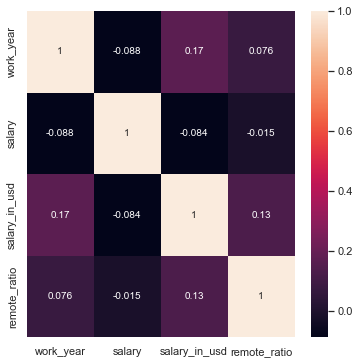

In [16]:
#Visualize Correlations in a heatmap

plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

**Summary of Findings**
1. The Dataset contains 607 records and 12 features.
2. There are no missing values in the dataset.
3. Unnamed column is not useful for our analysis (Dropped column).
4. Data contains values from 2020 to 2022 Work Year
5. There are 4 unique experience levels with SE occuring 280 times.
6. The Dataset contains 4 employment types; FT (Full time employment) is the most common type occurring 588 instances).
7. There are 50 unique job titles.
8. Salary is recorded in 17 different currencies.
9. The average salary in USD is 112,297.87
10. Employees are resident in 57 locations while the Companies are located in 50 locations.
11. The US contains the most Data Science professionals and companies with 332 professionals and 355 companies resident in the US.












# **Here i start Exploratory Data Analysis**
### Univariate anaysis
##### Experience Level

In [14]:
df.experience_level.replace({'EN':'Entry-Level/Junior','MI':'Mid-level/Intermediate','SE':'Senior-level/Expert','EX':'Executive-level/Director'}, inplace=True)


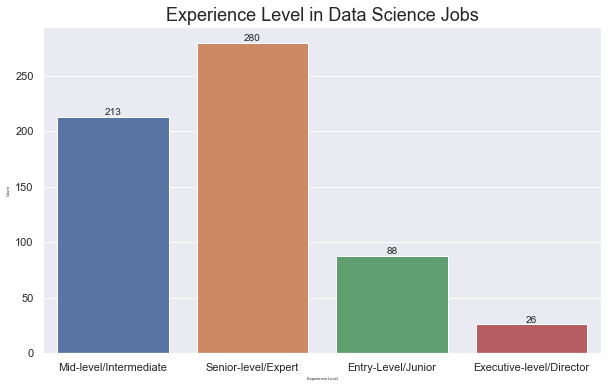

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='experience_level',data=df)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Experience Level in Data Science Jobs',fontsize=18)
plt.ylabel('Count',fontsize=4)
plt.xlabel('Experience Level',fontsize=4)

plt.show()


here is in date set mostly candidate are Senior/Expert after onward is Mid-level

In [23]:
experience_ratio = df.experience_level.value_counts(normalize=True)
display(experience_ratio)

Senior-level/Expert         0.461285
Mid-level/Intermediate      0.350906
Entry-Level/Junior          0.144975
Executive-level/Director    0.042834
Name: experience_level, dtype: float64

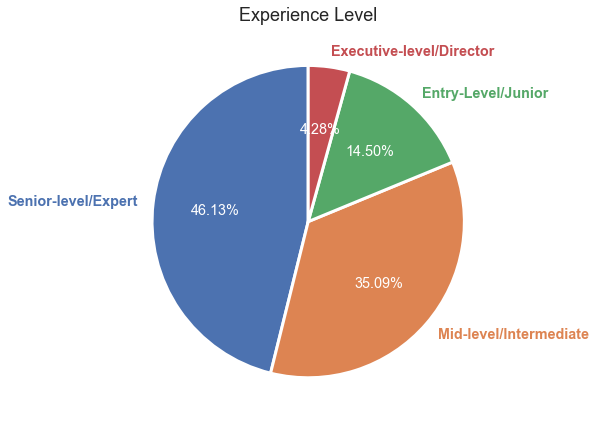

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
x=experience_ratio

labels = ['Senior-level/Expert','Mid-level/Intermediate','Entry-Level/Junior','Executive-level/Director']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Experience Level', fontsize=18)
plt.tight_layout()

In [34]:
levels = df.experience_level.value_counts()
levels

Senior-level/Expert         280
Mid-level/Intermediate      213
Entry-Level/Junior           88
Executive-level/Director     26
Name: experience_level, dtype: int64

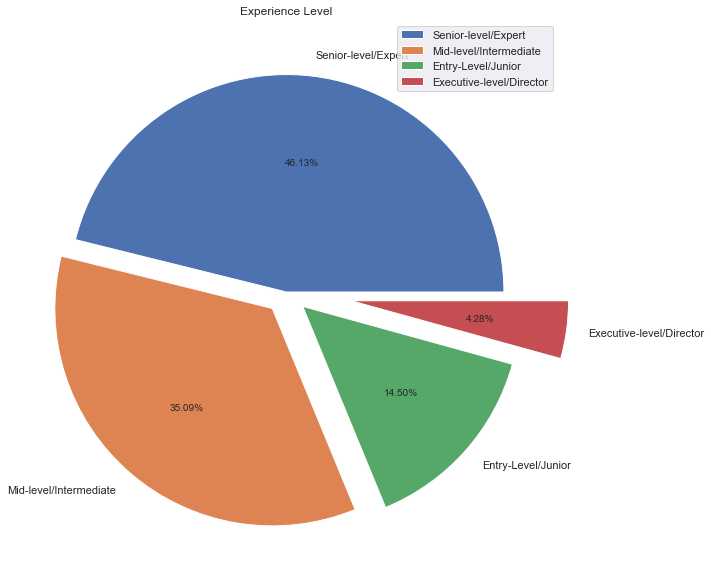

In [35]:
figure_size()
explode = [0,0.1,0.1, 0.3]
plt.pie(x = levels.values,labels =levels.index,autopct='%1.2f%%',explode = explode)
plt.title('Experience Level')
plt.legend()
plt.show()

*A large percentage of Data Science Professionals occupy Senior-level/Expert as well as Mid-level/Intermediate positions. However, Executive-level/Directors in Data Science are few; accounting for only 4.28% of the dataset.*

# Analyze Job Title

In [25]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [28]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending=False) 
jobs.head()

,job_title,0
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16


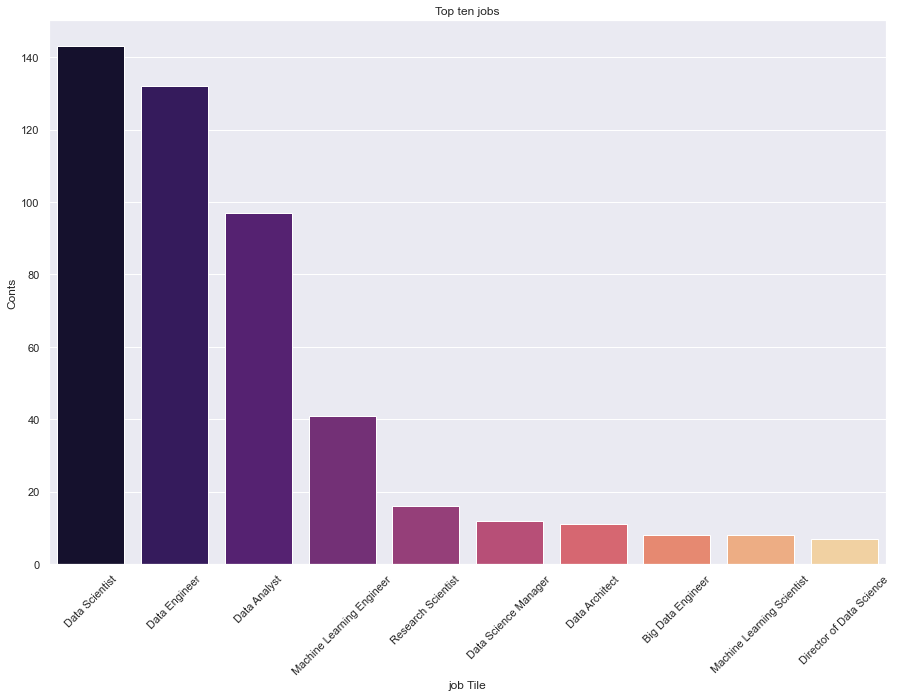

In [30]:
figure_size()
sns.set_style('darkgrid')
sns.barplot(x='job_title',y=0,data=jobs[:10],palette='magma')
plt.title('Top ten jobs')
plt.xlabel('job Tile')
plt.ylabel('Conts')
plt.xticks(rotation=45)
plt.show()

In [31]:
fig = px.pie(jobs[:10],values=0,names='job_title',title='top job title in data science')
fig.show()

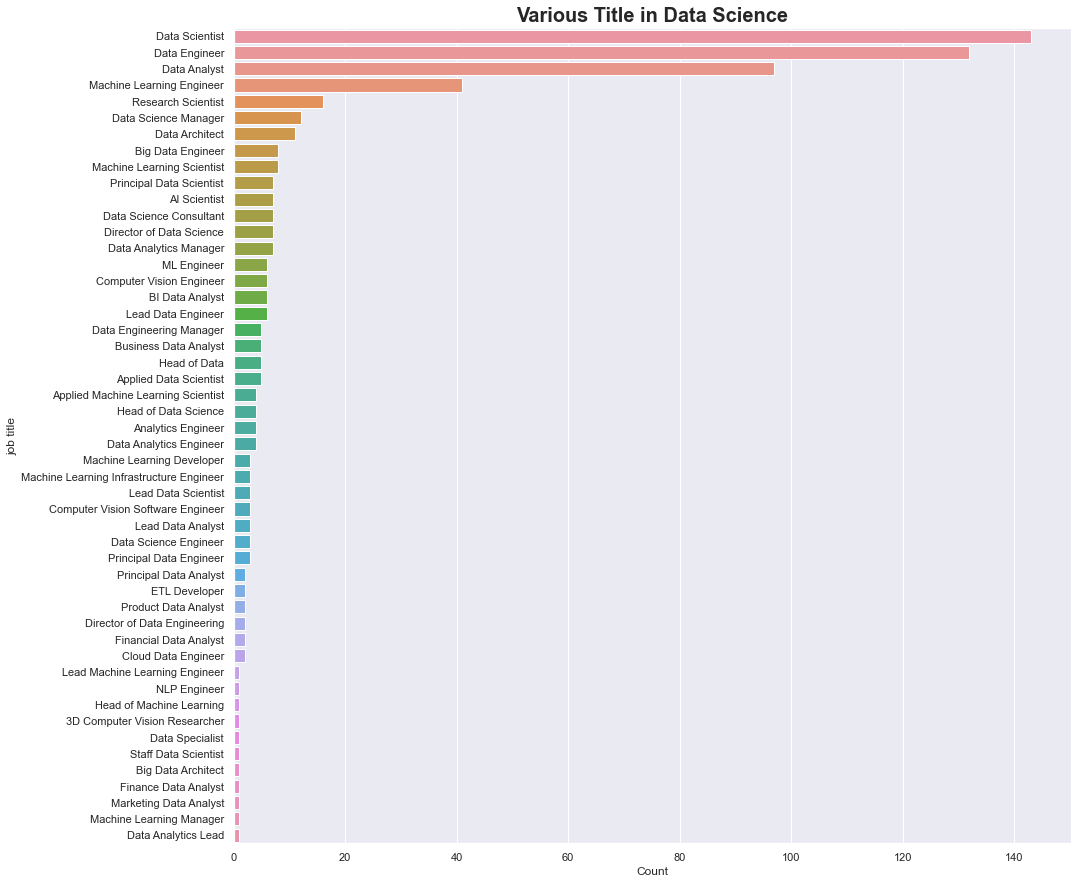

In [40]:
# the all title of the data science 
plt.figure(figsize=(15,15))
plt.title('Various Title in Data Science',fontsize=20,fontweight='bold')
sns.countplot(y='job_title',data=df,order=df['job_title'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('job title')
plt.show()

In [32]:
ax2= px.treemap(df,path=['job_title'],title="Top Job Titles")
ax2.show()

(-0.5, 2999.5, 1999.5, -0.5)

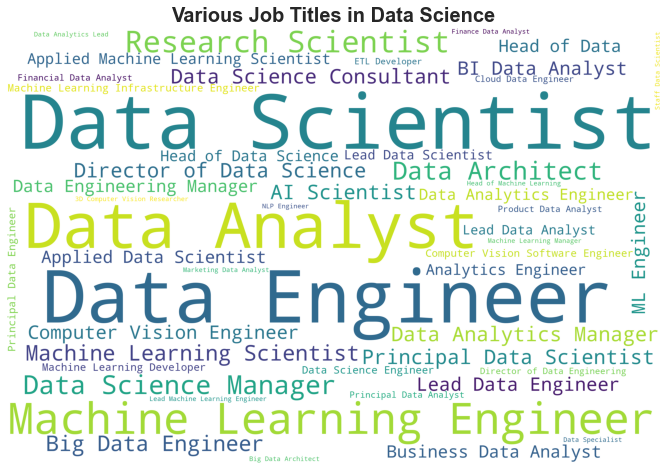

In [42]:
from wordcloud import WordCloud, STOPWORDS

#Create text variable
from collections import Counter
word_cloud_list=Counter(df.job_title)

#Generate Word Cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    #random_state=1,
    background_color="white",
    #colormap="Set2",
    collocations= False,
    stopwords=STOPWORDS,
).generate_from_frequencies(word_cloud_list)

# Display the generated word cloud
plt.figure(figsize=(15,8))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
plt.imshow(wordcloud)
plt.axis("off")

**Observation**

it is observed that most of jobs rols in dataset Contains Data Science Jobs 

# Employment Type

In [53]:
emp_type=df['employment_type'].value_counts()

In [47]:
df.employment_type.replace({'FT':'Full-Time','PT':'Part-Time','CT':'Contract','FL':'Freelance'},inplace=True)

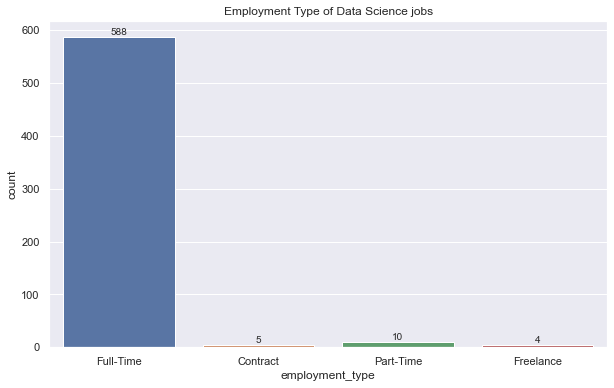

In [49]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='employment_type',data=df)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Employment Type of Data Science jobs')
plt.show()

In [51]:
emp_type_ratio = df.employment_type.value_counts(normalize=True)
display(emp_type_ratio)

Full-Time    0.968699
Part-Time    0.016474
Contract     0.008237
Freelance    0.006590
Name: employment_type, dtype: float64

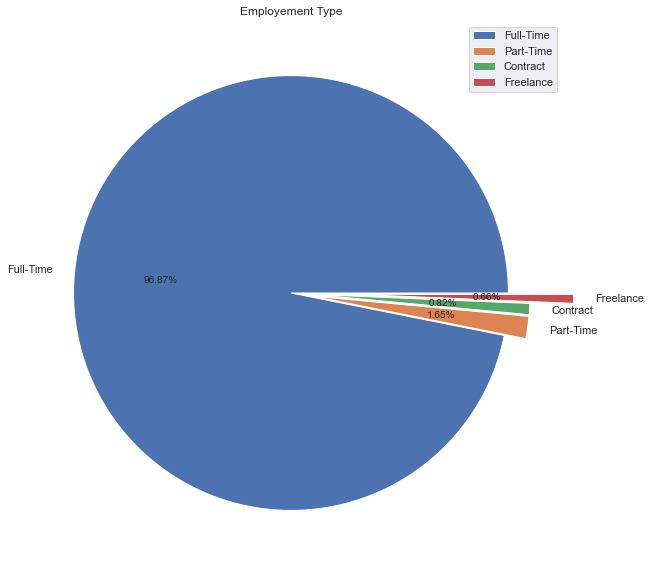

In [55]:
figure_size()
explode = [0,0.1,0.1, 0.3]
plt.pie(x = emp_type.values,labels =emp_type.index,autopct='%1.2f%%',explode = explode)
plt.title('Employement Type')
plt.legend()
plt.show()

**OBSERVATION**

It is observed that most of the Employees are doing Full Time Jobs.¶


## Employee Residence & Company Location

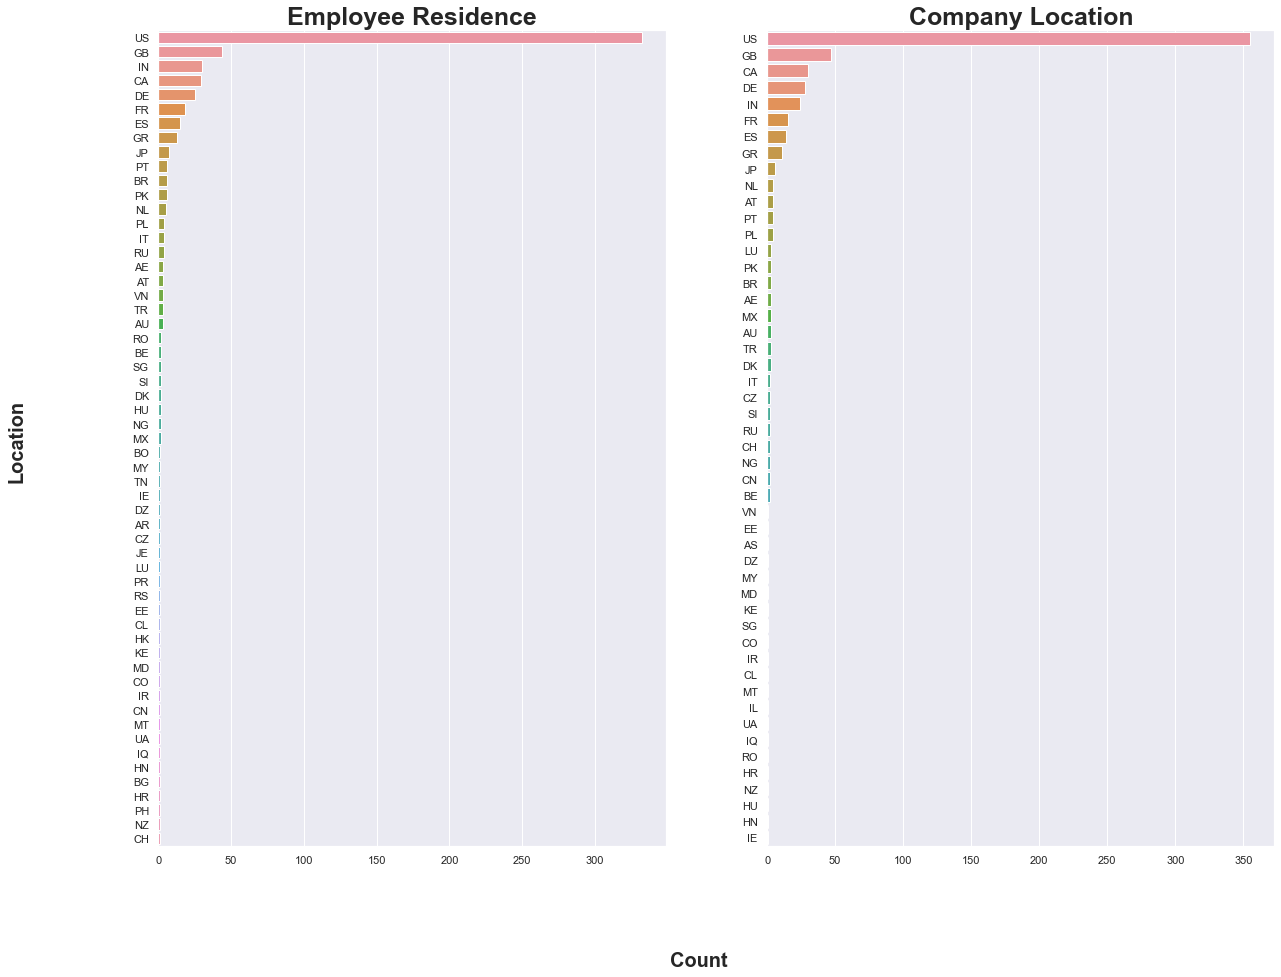

In [57]:
fig,axes=plt.subplots(1,2,figsize=(20,15))
sns.countplot(ax=axes[0],y='employee_residence', data=df, order=df['employee_residence'].value_counts().index)
sns.countplot(ax=axes[1],y='company_location', data=df,  order=df['company_location'].value_counts().index)

axes[0].set_title('Employee Residence', fontsize=25, fontweight='bold')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set_title('Company Location', fontsize=25, fontweight='bold')
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

fig.supxlabel('Count', fontsize=20, fontweight='bold')
fig.supylabel('Location', fontsize=20, fontweight='bold')

plt.show()

In [58]:
exlevel_location = df.groupby(['experience_level','company_location']).size()
exlevel_location

experience_level     company_location
Entry-Level/Junior   AS                    1
                     AU                    2
                     CA                    3
                     CH                    1
                     CN                    1
                                        ... 
Senior-level/Expert  NZ                    1
                     PT                    1
                     SI                    1
                     TR                    1
                     US                  218
Length: 93, dtype: int64

*For Employee Residence and Company location, the US is the highest in terms of frequency, followed by Great Britain. A total of over 300 Employees and Companies are resident in the US while other locations record values below 50 for both Employee residence and company location.*

# **Company Size**

In [60]:
# Rename Company Size
df.company_size.replace({'S':'Small(<50)','M':'Medium(50-250)','L':'Large(>250)'}, inplace=True)

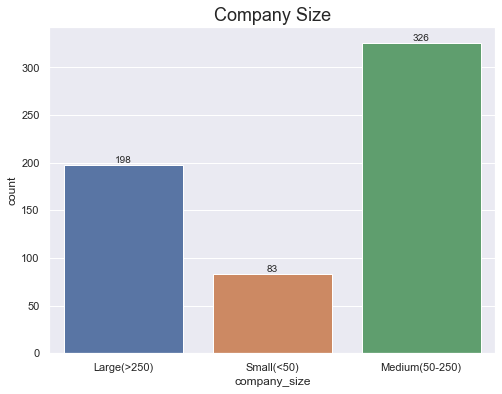

In [61]:
plt.figure(figsize=(8,6))
plt.title('Company Size', fontsize=18)
ax = sns.countplot (x='company_size', data=df)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [63]:
size_ratio = df.company_size.value_counts(normalize=True)
display(size_ratio)

Medium(50-250)    0.537068
Large(>250)       0.326194
Small(<50)        0.136738
Name: company_size, dtype: float64

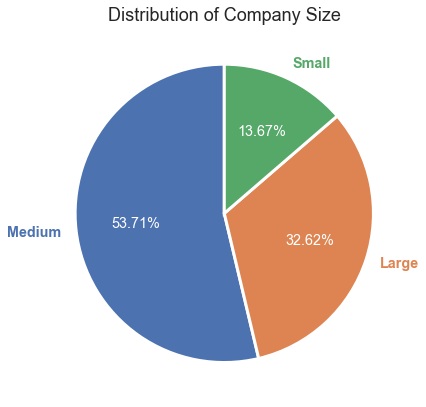

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))
x=size_ratio
labels = ['Medium','Large','Small']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Distribution of Company Size', fontsize=18)
plt.tight_layout()

*Most companies with Data Science Professionals are Medium Sized companies. Small companies have the least number of Data Science jobs.*

### Numeric variables

#### Work Year

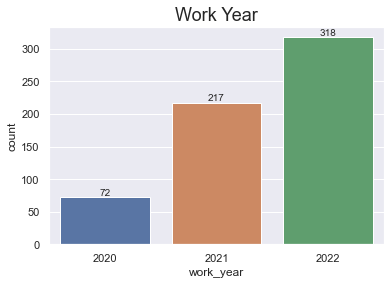

In [66]:
plt.title ('Work Year', fontsize=18)
ax = sns.countplot(x='work_year', data=df)
for i in ax.containers:
    ax.bar_label(i)

In [68]:
year_ratio = df.work_year.value_counts(normalize=True)
display(year_ratio)

2022    0.523888
2021    0.357496
2020    0.118616
Name: work_year, dtype: float64

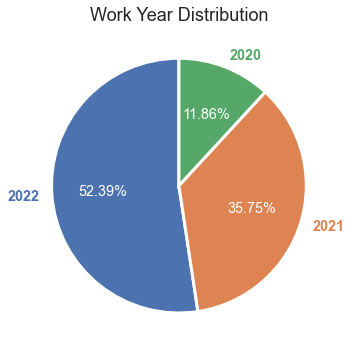

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))
x = year_ratio
labels = ['2022','2021','2020']


patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Work Year Distribution', fontsize=18)
plt.tight_layout()

*The Dataset contains values from 2020 - 2022 with 2022 records accounting for 52.39% and 2020 being 11.9%*

**Salary in USD**

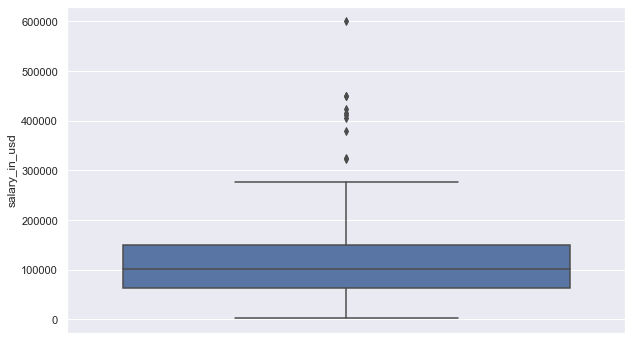

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(y='salary_in_usd',data=df)
plt.show()

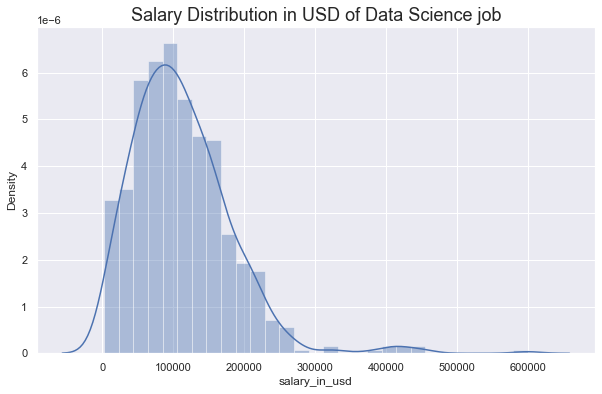

In [74]:
# dist plot
plt.figure(figsize=(10, 6)) # set figure size
sns.distplot(df['salary_in_usd'])
plt.title('Salary Distribution in USD of Data Science job',fontsize=18)
plt.show()

**Remote Ratio**

In [76]:
# Rename Employment Type values
df.remote_ratio.replace({0:'No remote work',50:'Partially remote',100:'Fully remote'}, inplace=True)

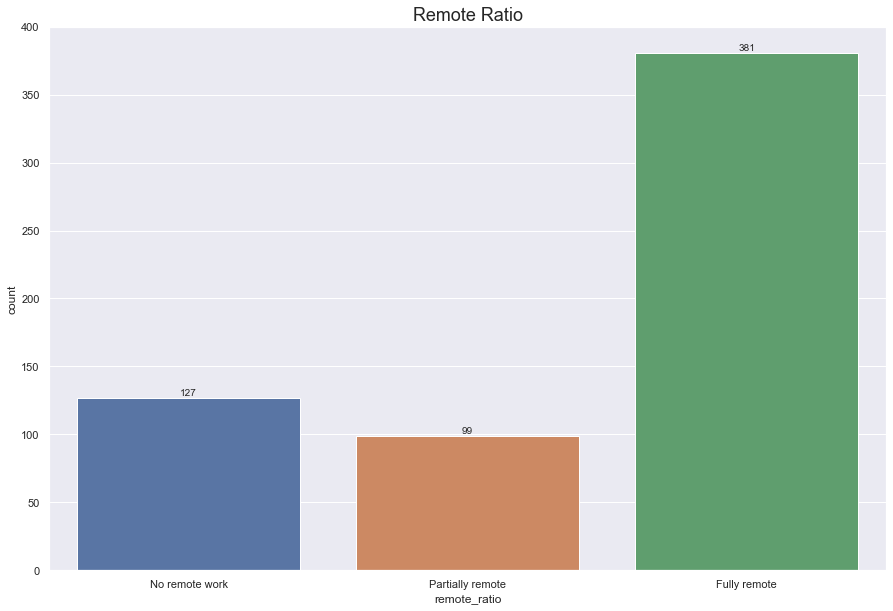

In [78]:
figure_size()
plt.title ('Remote Ratio', fontsize=18)
ax = sns.countplot(x='remote_ratio', data=df)
for i in ax.containers:
    ax.bar_label(i)

In [80]:
remote_work_ratio = df.remote_ratio.value_counts(normalize=True)
display(remote_work_ratio)

Fully remote        0.627677
No remote work      0.209226
Partially remote    0.163097
Name: remote_ratio, dtype: float64

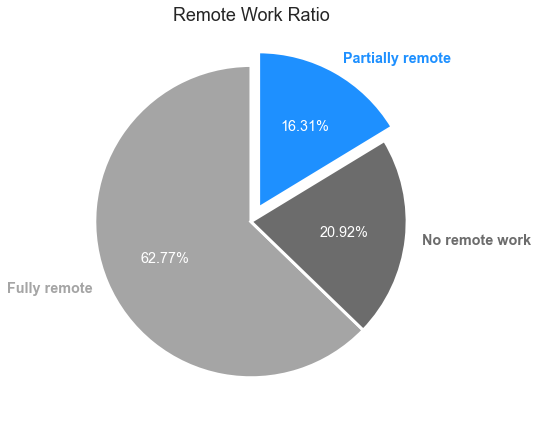

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))

x=remote_work_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45,0.85, len(x))))

colors[2]='dodgerblue'
labels = ['Fully remote','No remote work','Partially remote']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the wedge to highlight it.
    explode=(0, 0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Remote Work Ratio', fontsize=18)
plt.tight_layout()

**Work Year Analysis**

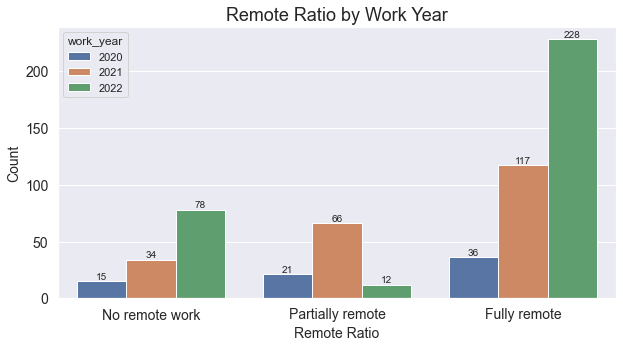

In [82]:
plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='remote_ratio', data=df, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Experience Level Analysis
**Employment Type by Experience Level**

In [83]:
type_level_pivot = pd.crosstab(df['employment_type'],df['experience_level'])
display(type_level_pivot)

experience_level,Entry-Level/Junior,Executive-level/Director,Mid-level/Intermediate,Senior-level/Expert
employment_type,,,,
Contract,2,1,1,1
Freelance,0,0,3,1
Full-Time,79,25,206,278
Part-Time,7,0,3,0


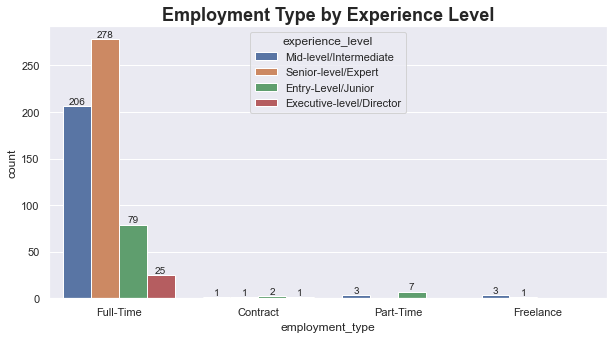

In [84]:
plt.figure(figsize=(10,5))
plt.title('Employment Type by Experience Level', fontsize=18, weight='bold')
ax=sns.countplot(x='employment_type', data=df, hue = 'experience_level')
for i in ax.containers:
    ax.bar_label(i)

# **Top 3 Job Title by Experience Level**

In [86]:

top_titles = df['job_title'].value_counts()[:3]
top_titles

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

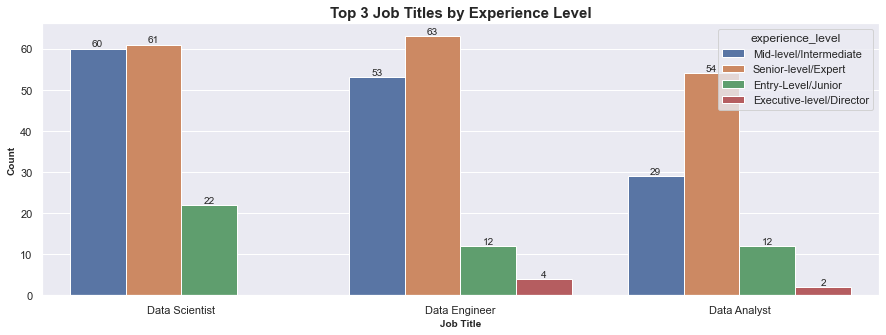

In [89]:
plt.figure(figsize=(15,5))
plt.title('Top 3 Job Titles by Experience Level', fontsize=15, fontweight='bold')
ax=sns.countplot(x='job_title', hue='experience_level', data=df, 
              order=df['job_title'].value_counts().iloc[:3].index)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Job Title', fontsize=10, fontweight='bold')
plt.show()

**Company Size by Experience Level**

In [92]:
size_level_pivot = pd.crosstab(df['company_size'],df['experience_level'])
display(size_level_pivot)

experience_level,Entry-Level/Junior,Executive-level/Director,Mid-level/Intermediate,Senior-level/Expert
company_size,,,,
Large(>250),29,11,86,72
Medium(50-250),30,12,98,186
Small(<50),29,3,29,22


<Figure size 1080x720 with 0 Axes>

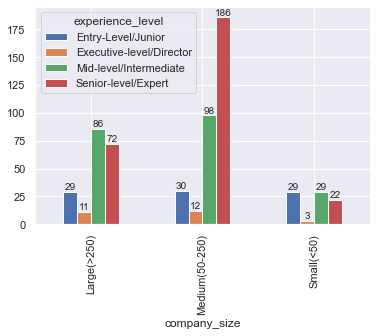

In [94]:
figure_size()
ax=size_level_pivot.plot.bar()
for i in ax.containers:
    ax.bar_label(i)

*Medium-Sized companies hire more Data professionals in every experience level although there are significantly more Senior-level/Expert employees compared to other levels.*

#  Company Location Analysis
**Experience Level**

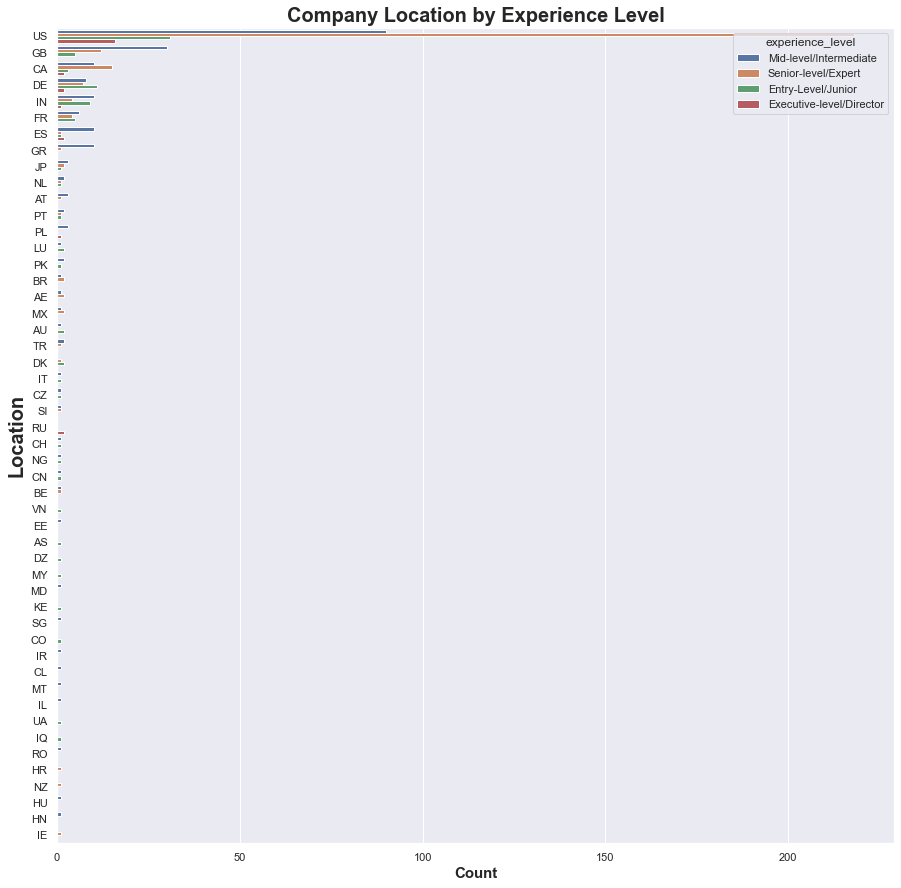

In [95]:
plt.figure(figsize=(15,15))
plt.title('Company Location by Experience Level', fontsize=20, fontweight='bold')
sns.countplot(y='company_location', hue='experience_level', data=df, order=df['company_location'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Location', fontsize=20, fontweight='bold')
plt.show()

#  Salary Analysis
**Salary by work year**

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

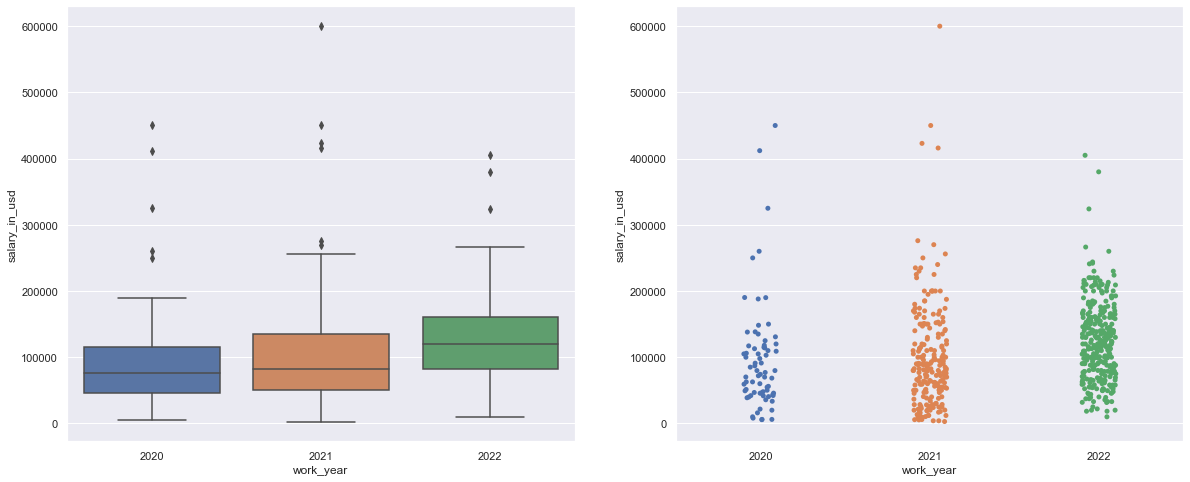

In [96]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='work_year',y='salary_in_usd', data=df)
sns.stripplot(ax=axes[1],x='work_year',y='salary_in_usd', data=df)

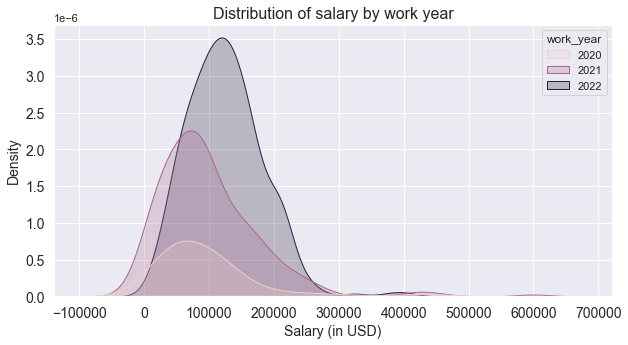

In [98]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='salary_in_usd', hue='work_year', fill=True)
plt.title("Distribution of salary by work year", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

*The density plot shows an increase in the number of Data Science jobs and salary for each year.*

#  Salary by Experience Level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

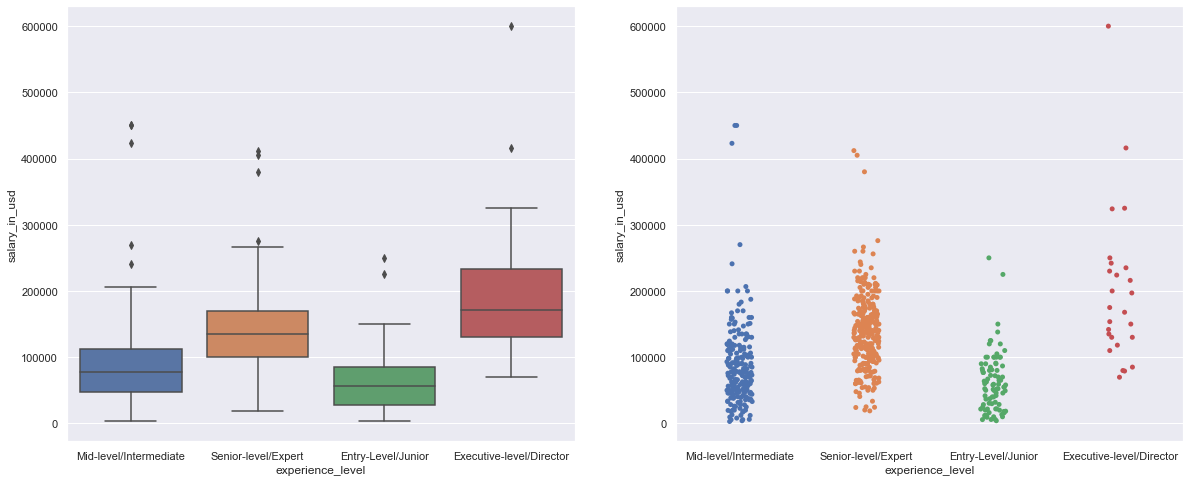

In [100]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='experience_level',y='salary_in_usd', data=df)
sns.stripplot(ax=axes[1],x='experience_level',y='salary_in_usd', data=df)

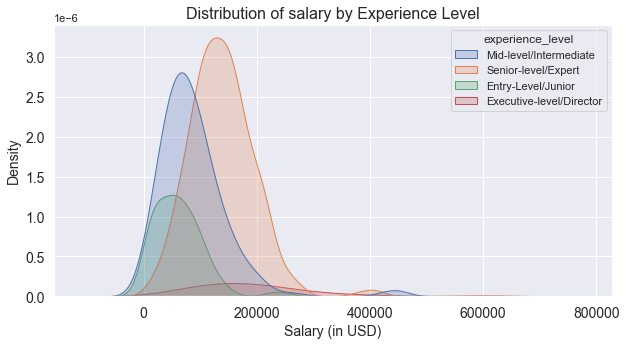

In [102]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='salary_in_usd', hue='experience_level', fill=True)
plt.title("Distribution of salary by Experience Level", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

*The average salary is higher for a higher experience level. Executive-level/Directors are paid the highest salaries of all the experience levels on average, and Entry-level are the least earners.*

**Salary by Company Size**

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

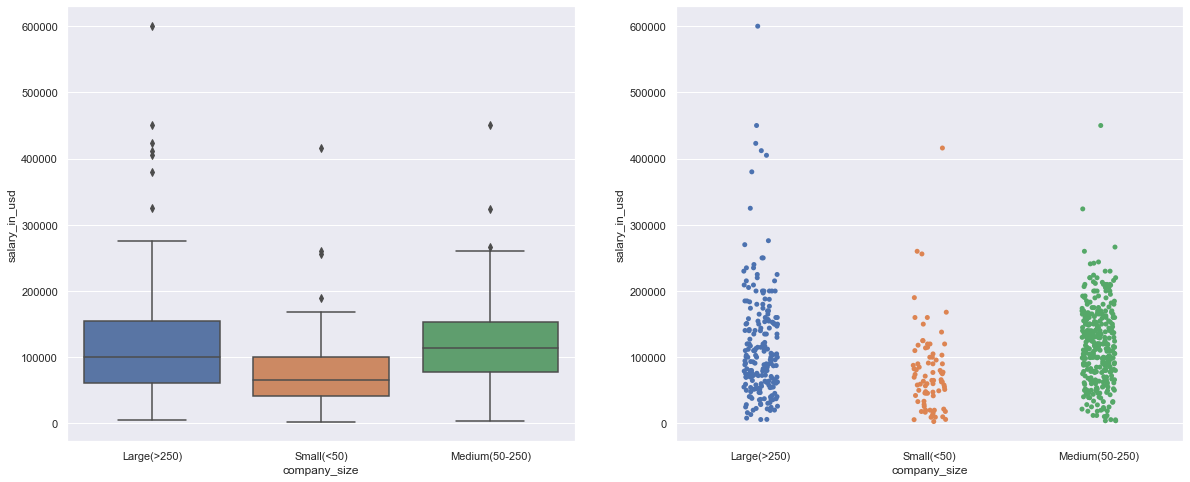

In [103]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='company_size',y='salary_in_usd', data=df)
sns.stripplot(ax=axes[1],x='company_size',y='salary_in_usd', data=df)

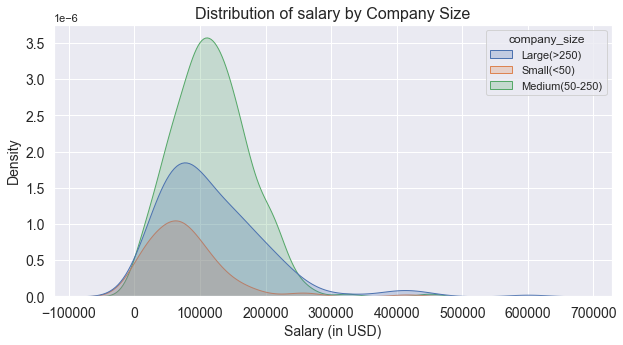

In [104]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='salary_in_usd', hue='company_size', fill=True)
plt.title("Distribution of salary by Company Size", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

*Medium and Large-sized companies have higher pay in comparison to small sized companies*

**Highest salaries by job title**

In [105]:
title_sal_pivot = pd.pivot_table(data=df,index=['job_title'],values=['salary_in_usd'], aggfunc='max').sort_values(by=['salary_in_usd'],ascending=False)
display(title_sal_pivot)

,salary_in_usd
job_title,
Principal Data Engineer,600000
Financial Data Analyst,450000
Research Scientist,450000
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
Data Scientist,412000
Data Analytics Lead,405000
Applied Data Scientist,380000
Director of Data Science,325000


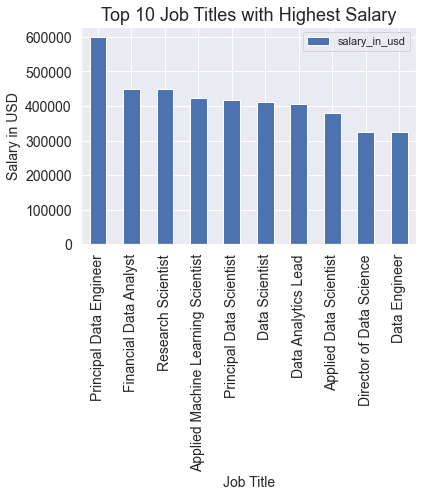

In [106]:
title_sal_pivot.head(10).plot.bar()
plt.title('Top 10 Job Titles with Highest Salary', fontsize=18)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

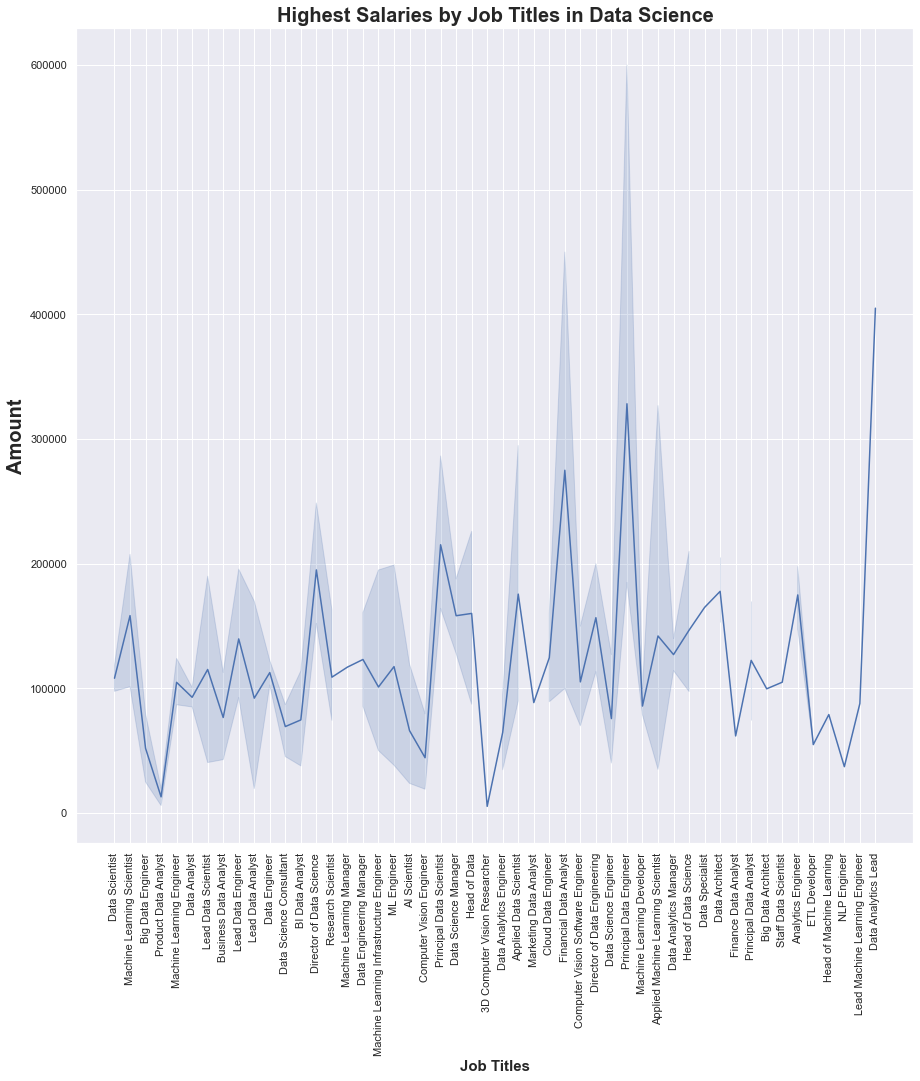

In [107]:
plt.figure(figsize=(15,15))
plt.title('Highest Salaries by Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='job_title', data=df)
plt.xlabel('Job Titles', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

**Average Salary by Company Location**

In [108]:
loc_sal_pivot = pd.pivot_table(data=df,index=['company_location'],values=['salary_in_usd'], aggfunc='mean').sort_values(by=['salary_in_usd'],ascending=False)
display(loc_sal_pivot)

,salary_in_usd
company_location,
RU,157500.000000
US,144055.261972
NZ,125000.000000
IL,119059.000000
JP,114127.333333
AU,108042.666667
AE,100000.000000
DZ,100000.000000
IQ,100000.000000


<Axes: ylabel='company_location'>

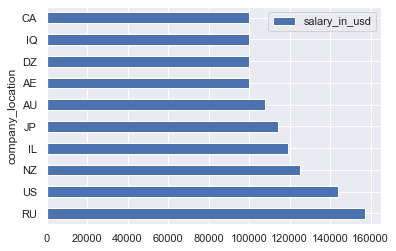

In [109]:
loc_sal_pivot.head(10).plot.barh()

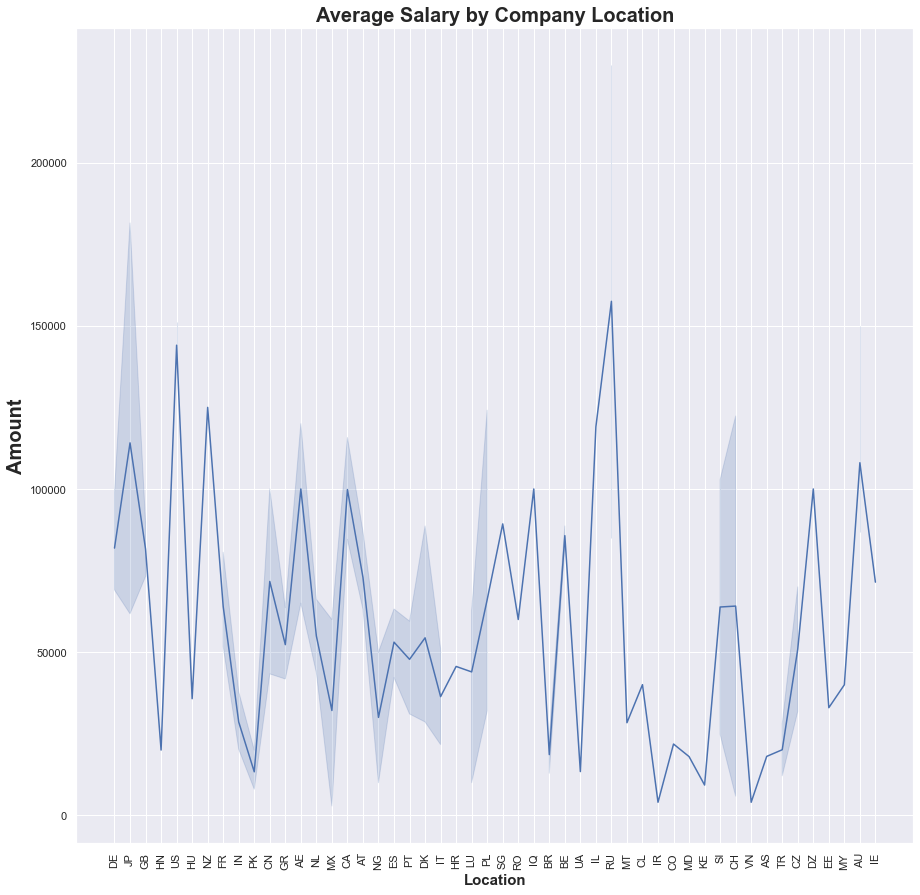

In [110]:
plt.figure(figsize=(15,15))
plt.title('Average Salary by Company Location', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='company_location', data=df)
plt.xlabel('Location', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

# **Summary**

1. Most Data Science jobs require Senior-level/Expert experience level and very few positions are available for Executive-level/Directors.
2. The most common job titles in the Data Science field are Data Scientist, Data Engineer, Data Analyst and Machine Learning Engineer.
3. Most positions are Full-time employment.
4. Most Data Science employees and Companies are resident in the United States. However, the location where the highest average salary is paid is Russia; followed closely by the United States.
5. The Number of Data Science jobs and the salary are increasing with each year and experience-level.
6. Medium-sized and Large-sized companies pay high salaries in comparison to small-sized companies.
7. The average salary for Data Science Jobs in USD is 112,297.87.

**It is important to note that the insights are based on a sample of 607 participants and may not be representative of the entire population of data science professionals.**





